In [2]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser
import panel as pn

pn.extension()

%matplotlib inline


In [3]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from ProcessingTools import DateProcessingTools


In [4]:
# Construct the tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)


In [5]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)


In [6]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)


In [139]:
atlas.reset_index()

,Customers,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,State,Lat,Long,Service Start,Service End,Subscription Duration
0,Louisiana Board of Regents,NaN,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",LA,30.460190,-91.188530,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
1,Emporia State University,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",KS,38.392609,-96.181396,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
2,Morehead State University,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",KY,38.184921,-83.434441,2015-06-10 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
3,State University of NY Potsdam,NaN,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,"44 Pierrepont Ave, Potsdam, NY 13676",NY,44.663780,-74.978409,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
4,ST. Mary's College of Maryland,NaN,2015-10-07 00:00:00-04:00,AJ504,750.0,1 Year,4700-0-00-00000-20-0000,"47645 College Dr, St Marys City, MD 20686",MD,38.190601,-76.426300,2015-10-05 00:00:00-04:00,2016-09-30 00:00:00-04:00,365 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,"CA State University, Stanislaus",10.0,2020-12-03 00:00:00-05:00,NB120320,100.0,1 Year,4700-0-00-00000-00-0000,"1 University Circle, Suite DBH 301, Turlock, C...",CA,37.524990,-120.858459,2020-07-15 00:00:00-04:00,2021-07-31 00:00:00-04:00,365 days
689,"University of South Carolina, Beaufort",150.0,2020-12-03 00:00:00-05:00,NB120320D,1500.0,6 Months,4700-0-00-00000-00-0000,"1 University Blvd, Bluffton, SC 29909",SC,32.303215,-80.973589,2020-12-01 00:00:00-05:00,2021-05-31 00:00:00-04:00,180 days
690,West Liberty University,350.0,2020-12-03 00:00:00-05:00,NB120320C,3500.0,1 Year,4700-0-00-00000-00-0000,"208 University Dr. CUB 147, West Liberty, WV ...",WV,40.053501,-80.603799,2021-01-16 00:00:00-05:00,2022-01-31 00:00:00-05:00,365 days
691,Saint Xavier University,20.0,2020-12-03 00:00:00-05:00,NB120320E,200.0,1 Year,4700-0-00-00000-00-0000,"3700 W. 103rd St, Chicago, IL 60655",IL,41.707169,-87.713854,2020-08-01 00:00:00-04:00,2021-07-31 00:00:00-04:00,365 days


In [121]:
atlas = atlas.sort_values(by='Invoice Date')
atlas

,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,State,Lat,Long,Service Start,Service End,Subscription Duration
Customers,,,,,,,,,,,,,
Louisiana Board of Regents,NaN,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",LA,30.460190,-91.188530,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
Emporia State University,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",KS,38.392609,-96.181396,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
Morehead State University,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",KY,38.184921,-83.434441,2015-06-10 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
State University of NY Potsdam,NaN,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,"44 Pierrepont Ave, Potsdam, NY 13676",NY,44.663780,-74.978409,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
ST. Mary's College of Maryland,NaN,2015-10-07 00:00:00-04:00,AJ504,750.0,1 Year,4700-0-00-00000-20-0000,"47645 College Dr, St Marys City, MD 20686",MD,38.190601,-76.426300,2015-10-05 00:00:00-04:00,2016-09-30 00:00:00-04:00,365 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"CA State University, Stanislaus",10.0,2020-12-03 00:00:00-05:00,NB120320,100.0,1 Year,4700-0-00-00000-00-0000,"1 University Circle, Suite DBH 301, Turlock, C...",CA,37.524990,-120.858459,2020-07-15 00:00:00-04:00,2021-07-31 00:00:00-04:00,365 days
"University of South Carolina, Beaufort",150.0,2020-12-03 00:00:00-05:00,NB120320D,1500.0,6 Months,4700-0-00-00000-00-0000,"1 University Blvd, Bluffton, SC 29909",SC,32.303215,-80.973589,2020-12-01 00:00:00-05:00,2021-05-31 00:00:00-04:00,180 days
West Liberty University,350.0,2020-12-03 00:00:00-05:00,NB120320C,3500.0,1 Year,4700-0-00-00000-00-0000,"208 University Dr. CUB 147, West Liberty, WV ...",WV,40.053501,-80.603799,2021-01-16 00:00:00-05:00,2022-01-31 00:00:00-05:00,365 days


In [141]:
atlas.dtypes

Number of Users                                   float64
Invoice Date             datetime64[ns, America/New_York]
Invoice #                                          object
Invoice Amount                                    float64
Subscription                                       object
Account Code                                       object
Address                                            object
State                                              object
Lat                                               float64
Long                                              float64
Service Start            datetime64[ns, America/New_York]
Service End              datetime64[ns, America/New_York]
Subscription Duration                     timedelta64[ns]
dtype: object

In [146]:
atlas_grp = atlas.groupby('Customers').sum()
atlas_grp

,Number of Users,Invoice Amount,Lat,Long
Customers,,,,
Alabama A&M University-College of Education,0.0,5460.0,34.785061,-86.573280
Albertus Magnus College,0.0,5670.0,41.331299,-72.921440
Albuquerque Public Schools,0.0,2270.0,35.092410,-106.642950
Alcorn State University,0.0,1700.0,31.875710,-91.141739
Alderson Broaddus University,50.0,500.0,39.160261,-80.049048
...,...,...,...,...
Wingate University,100.0,625.0,34.986059,-80.443073
Winston-Salem State University,75.0,562.0,36.089607,-80.224567
Winthrop University,975.0,6062.5,244.569262,-567.209104


In [7]:
# Calculate the mean values for each neighborhood
#rankings_pd.rename(columns = {'test':'TEST', 'odi':'ODI', 
#                              't20':'T20'}, inplace = True) 

#atlas2.columns = ["Customers", "Lat", "Long"]

total_data = atlas.loc[:, ["Number of Users", "Invoice Amount"]].groupby(["Customers"]).sum()
# total_data.dropna(inplace=True)
total_data

atlas_with_totals = pd.concat([atlas.drop(columns=["Number of Users", "Invoice Amount"]), total_data], axis="columns", join="inner")
atlas_with_totals.head(5)


,Invoice Date,Invoice #,Subscription,Account Code,Address,State,Lat,Long,Service Start,Service End,Subscription Duration,Number of Users,Invoice Amount
Customers,,,,,,,,,,,,,
Alabama A&M University-College of Education,2018-03-23 00:00:00-04:00,105,3 Years,4700-0-00-00000-00-0000,"4900 Meridian St N, Huntsville, AL 35811",AL,34.785061,-86.573280,2018-03-21 00:00:00-04:00,2021-03-31 00:00:00-04:00,1095 days,0.0,5460.0
Albertus Magnus College,2018-05-16 00:00:00-04:00,127,3 Years,4700-0-00-00000-00-0000,"700 Prospect St, New Haven, CT 06511",CT,41.331299,-72.921440,2018-09-01 00:00:00-04:00,2021-08-31 00:00:00-04:00,1095 days,0.0,5670.0
Albuquerque Public Schools,2018-11-20 00:00:00-05:00,161,1 Year,4700-0-00-00000-00-0000,"Po Box 25704 Albuquerque, NM 87125",NM,35.092410,-106.642950,2018-11-19 00:00:00-05:00,2019-11-30 00:00:00-05:00,365 days,0.0,2270.0
Alcorn State University,2017-10-31 00:00:00-04:00,NaN,1 Year,4700-0-00-00000-00-0000,"1000 Asu Dr, Lorman, MS 39096",MS,31.875710,-91.141739,2017-08-31 00:00:00-04:00,2018-08-31 00:00:00-04:00,365 days,0.0,1700.0
Alderson Broaddus University,2020-10-07 00:00:00-04:00,NB100820K,3 Months,4700-0-00-00000-00-0000,"101 College Hill Rd, Philippi, WV 26416",WV,39.160261,-80.049048,2020-10-02 00:00:00-04:00,2020-12-31 00:00:00-05:00,90 days,50.0,500.0


In [8]:
atlas_with_totals.dtypes

Invoice Date             datetime64[ns, America/New_York]
Invoice #                                          object
Subscription                                       object
Account Code                                       object
Address                                            object
State                                              object
Lat                                               float64
Long                                              float64
Service Start            datetime64[ns, America/New_York]
Service End              datetime64[ns, America/New_York]
Subscription Duration                     timedelta64[ns]
Number of Users                                   float64
Invoice Amount                                    float64
dtype: object

In [10]:
atlas_with_totals.count()

Invoice Date             693
Invoice #                689
Subscription             693
Account Code             693
Address                  684
State                    687
Lat                      687
Long                     687
Service Start            690
Service End              688
Subscription Duration    693
Number of Users          693
Invoice Amount           693
dtype: int64

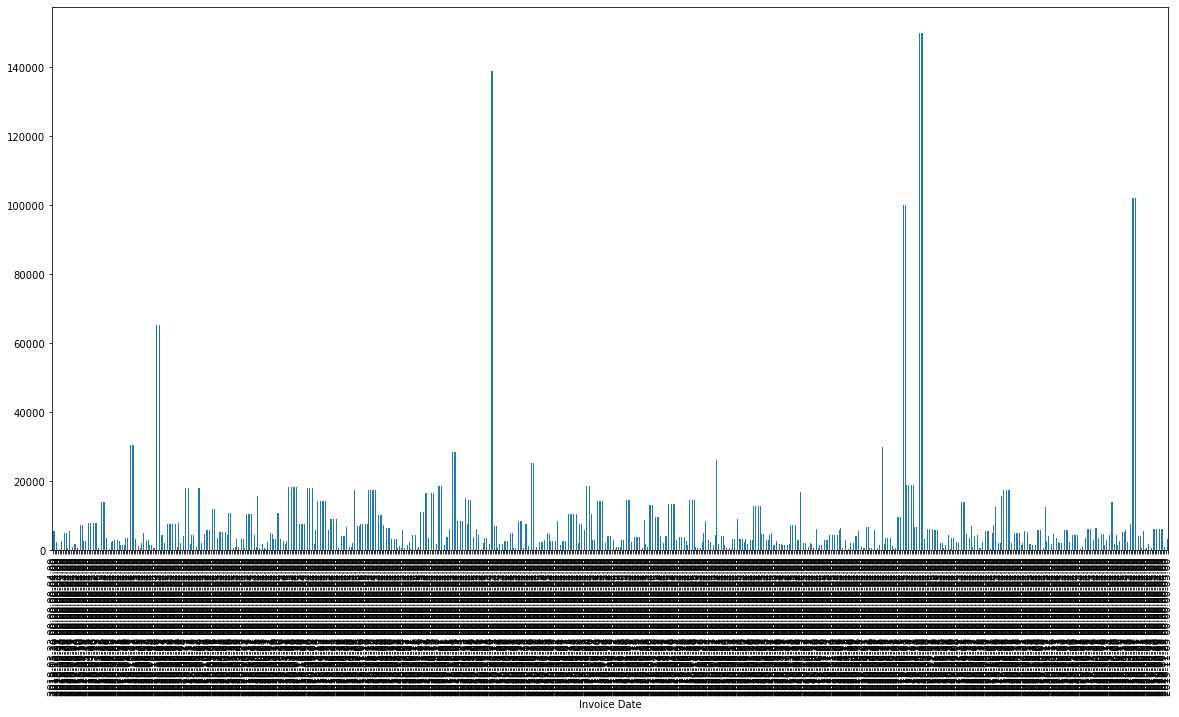

In [20]:
atlas_with_totals.set_index(pd.to_datetime(atlas_with_totals['Invoice Date'], infer_datetime_format=True), inplace=True)
atlas_with_totals["Invoice Amount"].plot(kind='bar', figsize=(20,10))

In [21]:
atlas_with_totals.describe()

,Lat,Long,Subscription Duration,Number of Users,Invoice Amount
count,687.000000,687.000000,693,693.000000,693.000000
mean,37.208476,-87.989244,386 days 21:22:04.675324,530.477633,8257.510173
std,5.763829,21.149808,275 days 14:17:15.562905,1307.970734,16223.803863
min,-35.001338,-157.924912,30 days 00:00:00,0.000000,125.000000
25%,34.210282,-91.357237,365 days 00:00:00,85.000000,2142.000000
50%,37.426347,-84.328396,365 days 00:00:00,250.000000,4350.000000
75%,40.684882,-78.666354,365 days 00:00:00,600.000000,8000.000000
max,48.739022,144.743881,1095 days 00:00:00,15050.000000,150000.000000


In [25]:
atlas_with_totals.iloc[0]

Invoice Date                            2018-03-23 00:00:00-04:00
Invoice #                                                     105
Subscription                                              3 Years
Account Code                              4700-0-00-00000-00-0000
Address                  4900 Meridian St N, Huntsville, AL 35811
State                                                          AL
Lat                                                       34.7851
Long                                                     -86.5733
Service Start                           2018-03-21 00:00:00-04:00
Service End                             2021-03-31 00:00:00-04:00
Subscription Duration                          1095 days 00:00:00
Number of Users                                                 0
Invoice Amount                                               5460
Name: 2018-03-23 00:00:00-04:00, dtype: object

In [76]:
data = atlas_with_totals.iloc[:, [0,2,5,11,12]]
data.head()

,Invoice Date,Subscription,State,Number of Users,Invoice Amount
Invoice Date,,,,,
2018-03-23 00:00:00-04:00,2018-03-23 00:00:00-04:00,3 Years,AL,0.0,5460.0
2018-05-16 00:00:00-04:00,2018-05-16 00:00:00-04:00,3 Years,CT,0.0,5670.0
2018-11-20 00:00:00-05:00,2018-11-20 00:00:00-05:00,1 Year,NM,0.0,2270.0
2017-10-31 00:00:00-04:00,2017-10-31 00:00:00-04:00,1 Year,MS,0.0,1700.0
2020-10-07 00:00:00-04:00,2020-10-07 00:00:00-04:00,3 Months,WV,50.0,500.0


In [77]:
data.drop(columns=['Invoice Date', 'Subscription', 'Number of Users'], inplace=True)
data

/Users/miladnazar/.conda/envs/pyvizenv/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,State,Invoice Amount
Invoice Date,,
2018-03-23 00:00:00-04:00,AL,5460.0
2018-05-16 00:00:00-04:00,CT,5670.0
2018-11-20 00:00:00-05:00,NM,2270.0
2017-10-31 00:00:00-04:00,MS,1700.0
2020-10-07 00:00:00-04:00,WV,500.0
...,...,...
2019-09-23 00:00:00-04:00,SC,6062.5
2020-10-13 00:00:00-04:00,SC,6062.5
2020-09-21 00:00:00-04:00,WA,1030.0


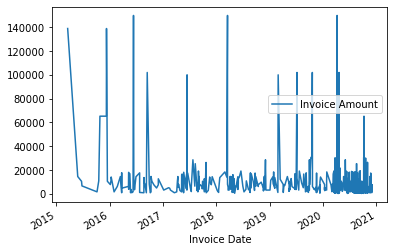

In [116]:
data.sort_values("Invoice Amount", ascending=False)
data.plot()

In [81]:
data.groupby(by='State').sum()
data

,State,Invoice Amount
Invoice Date,,
2018-03-23 00:00:00-04:00,AL,5460.0
2018-05-16 00:00:00-04:00,CT,5670.0
2018-11-20 00:00:00-05:00,NM,2270.0
2017-10-31 00:00:00-04:00,MS,1700.0
2020-10-07 00:00:00-04:00,WV,500.0
...,...,...
2019-09-23 00:00:00-04:00,SC,6062.5
2020-10-13 00:00:00-04:00,SC,6062.5
2020-09-21 00:00:00-04:00,WA,1030.0


In [ ]:
 - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.

In [82]:
data = data.sort_values(by='Invoice Date', ascending=False)

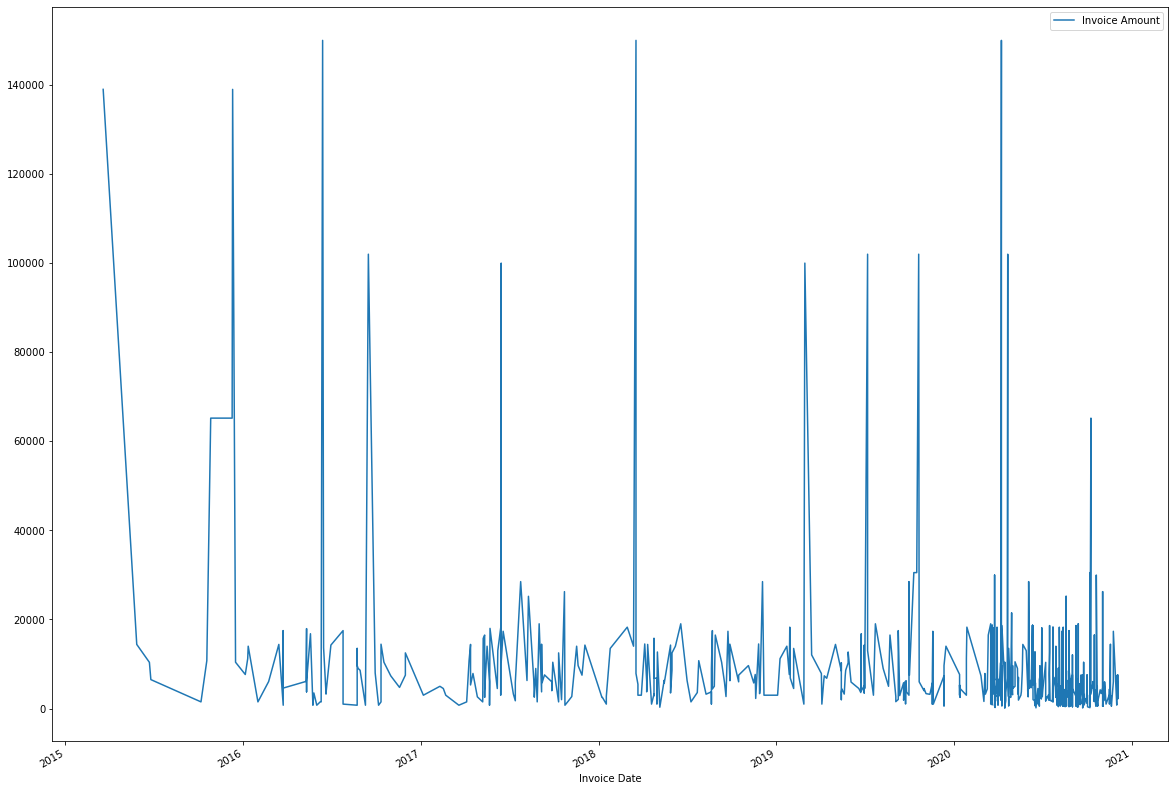

In [107]:
data.plot(figsize=(20,15))

In [85]:
data.tail()

,State,Invoice Amount
Invoice Date,,
2015-10-07 00:00:00-04:00,MD,1500.0
2015-06-26 00:00:00-04:00,NY,6500.0
2015-06-23 00:00:00-04:00,KY,10375.0
2015-05-28 00:00:00-04:00,KS,14400.0
2015-03-20 00:00:00-04:00,LA,139000.0


In [87]:
data.drop(columns=['State'], inplace=True)
data

,Invoice Amount
Invoice Date,
2020-12-03 00:00:00-05:00,2250.0
2020-12-03 00:00:00-05:00,7550.0
2020-12-03 00:00:00-05:00,3400.0
2020-12-03 00:00:00-05:00,7125.0
2020-12-03 00:00:00-05:00,3500.0
...,...
2015-10-07 00:00:00-04:00,1500.0
2015-06-26 00:00:00-04:00,6500.0
2015-06-23 00:00:00-04:00,10375.0


In [88]:
daily_returns = (data - data.shift(1)) / data.shift(1)
daily_returns.head()

,Invoice Amount
Invoice Date,
2020-12-03 00:00:00-05:00,NaN
2020-12-03 00:00:00-05:00,2.355556
2020-12-03 00:00:00-05:00,-0.549669
2020-12-03 00:00:00-05:00,1.095588
2020-12-03 00:00:00-05:00,-0.508772


In [89]:
daily_returns = data.pct_change()
daily_returns.head()

,Invoice Amount
Invoice Date,
2020-12-03 00:00:00-05:00,NaN
2020-12-03 00:00:00-05:00,2.355556
2020-12-03 00:00:00-05:00,-0.549669
2020-12-03 00:00:00-05:00,1.095588
2020-12-03 00:00:00-05:00,-0.508772


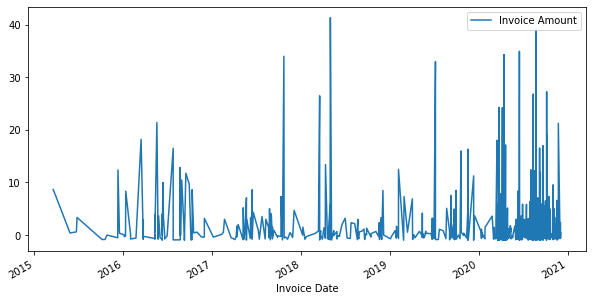

In [97]:
daily_returns.plot(figsize=(10,5))

In [108]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()

,Invoice Amount
Invoice Date,
2020-12-03 00:00:00-05:00,NaN
2020-12-03 00:00:00-05:00,3.355556
2020-12-03 00:00:00-05:00,1.511111
2020-12-03 00:00:00-05:00,3.166667
2020-12-03 00:00:00-05:00,1.555556


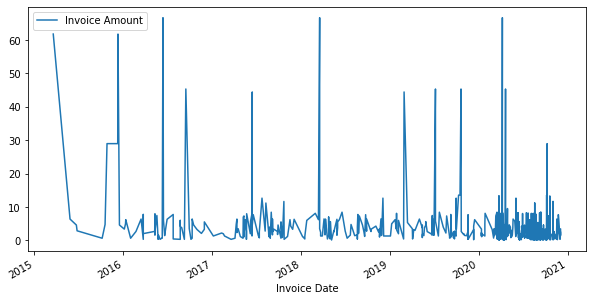

In [109]:
# Plot the daily returns of the S&P 500 over the last 5 years
cumulative_returns.plot(figsize=(10,5))